## üîç Explicabilidad de Modelos con SHAP

**SHAP (SHapley Additive exPlanations)** es un enfoque basado en teor√≠a de juegos para explicar la predicci√≥n de cualquier modelo de machine learning. Utiliza los valores de Shapley (de la teor√≠a cooperativa de juegos) para asignar a cada feature una contribuci√≥n justa en la predicci√≥n del modelo.

### üß† ¬øPor qu√© usar SHAP?

En modelos complejos (como Random Forests, XGBoost o redes neuronales), no es trivial entender por qu√© una predicci√≥n se dio. SHAP permite:

- Estimar **qu√© tan importante** es cada feature para la predicci√≥n.
- Visualizar c√≥mo **cambia la predicci√≥n** cuando cambia un feature.
- Comparar explicaciones **globales (todo el dataset)** vs. **locales (una predicci√≥n puntual)**.

### üîß ¬øC√≥mo funciona?

SHAP construye una predicci√≥n como la suma de contribuciones de cada feature respecto al valor esperado (baseline del modelo):

$$\hat{y}(x) = \mathbb{E}[\hat{y}] + \phi_1 + \phi_2 + \ldots + \phi_n$$

donde:

- $\hat{y}(x)$: predicci√≥n del modelo para una instancia.
- $E[\hat{y}]$: valor esperado del modelo (promedio de predicciones).
- $\phi_i$: valor SHAP del feature $i$, su contribuci√≥n al resultado.


### üìä Gr√°ficos t√≠picos

- **Bar Plot**: importancia media de cada feature (global).
- **Beeswarm Plot**: c√≥mo var√≠an las contribuciones por instancia (global).
- **Waterfall Plot**: c√≥mo se construye la predicci√≥n de un caso puntual (local).

### ‚ö†Ô∏è Nota para clasificaci√≥n

En tareas de clasificaci√≥n, SHAP devuelve una matriz 3D con explicaciones para cada clase. Para graficar, es necesario seleccionar una clase en particular, por ejemplo:

```python
shap_values_class1 = shap_values[:, :, 1]  # Clase positiva


## üìù Explicaci√≥n del c√≥digo SHAP

1. **Carga de librer√≠as y datos**
   - Se importan las librer√≠as necesarias: `shap`, `pandas`, `matplotlib`, y m√≥dulos de `sklearn`.
   - Se carga el dataset de c√°ncer de mama y se convierte en un DataFrame de pandas.

2. **Divisi√≥n de datos y entrenamiento**
   - Se divide el dataset en entrenamiento y test (`train_test_split`).
   - Se entrena un modelo Random Forest con los datos de entrenamiento.

3. **C√°lculo de valores SHAP**
   - Se crea un objeto `Explainer` de SHAP usando el modelo entrenado y los datos de entrenamiento.
   - Se calculan los valores SHAP para el set de test.
   - Como es un problema de clasificaci√≥n, se seleccionan los valores SHAP para la clase 1 (maligno).

4. **Gr√°ficos globales**
   - `shap.plots.beeswarm`: muestra la distribuci√≥n de las contribuciones de cada feature para todas las instancias.
   - `shap.plots.bar`: muestra la importancia media de cada feature.

5. **Interpretabilidad local (individual)**
   - Se recorre un ciclo para los primeros 5 ejemplos del set de test.
   - Para cada ejemplo, se imprime la clase real y se muestra un gr√°fico **waterfall** que explica c√≥mo cada feature contribuy√≥ a la predicci√≥n de ese caso puntual.

**Resumen:**  
El c√≥digo entrena un modelo de clasificaci√≥n, calcula explicaciones SHAP globales y locales, y visualiza la importancia y el impacto de cada feature tanto a nivel general como para ejemplos individuales. Esto ayuda a entender c√≥mo y por qu√© el modelo toma sus decisiones.

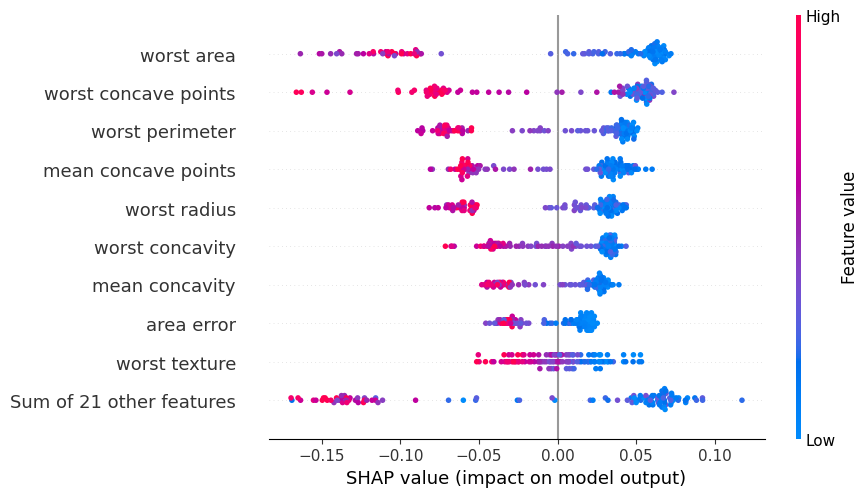

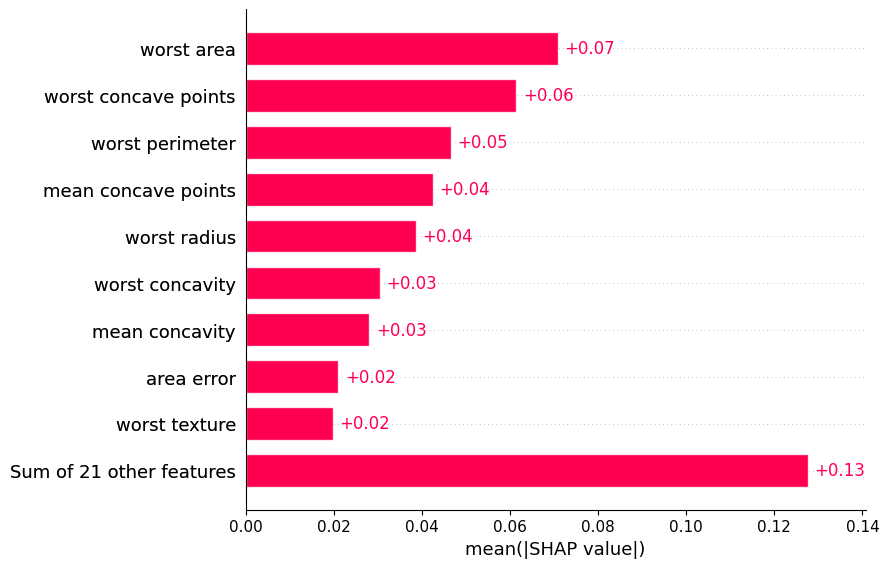

Ejemplo 0 - Clase real: 1


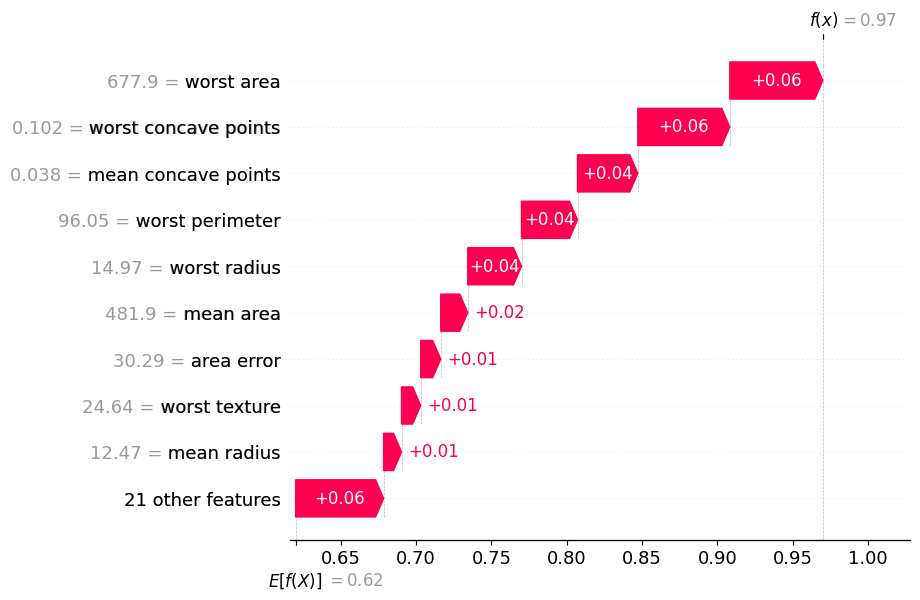

Ejemplo 1 - Clase real: 0


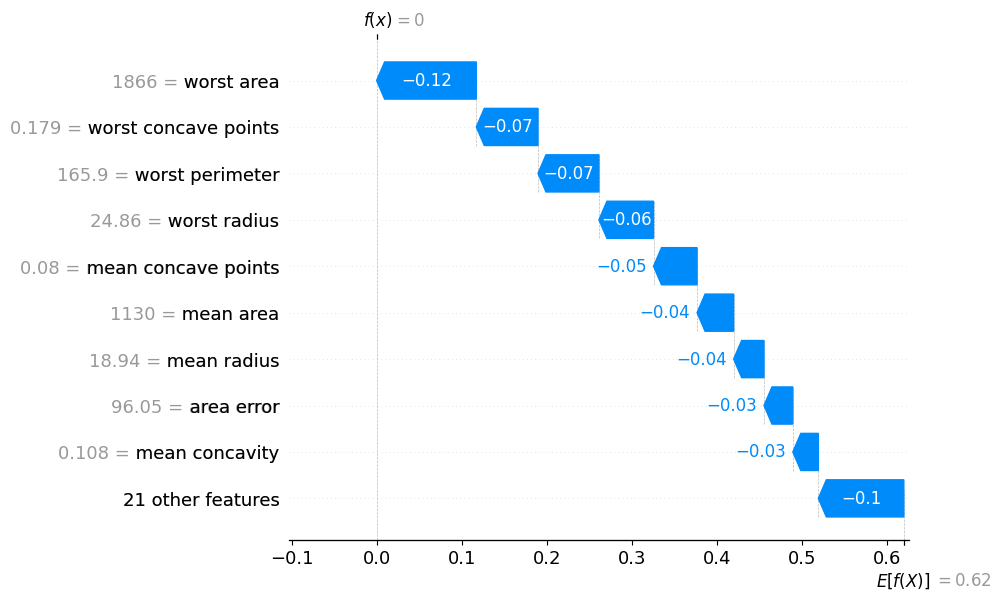

Ejemplo 2 - Clase real: 0


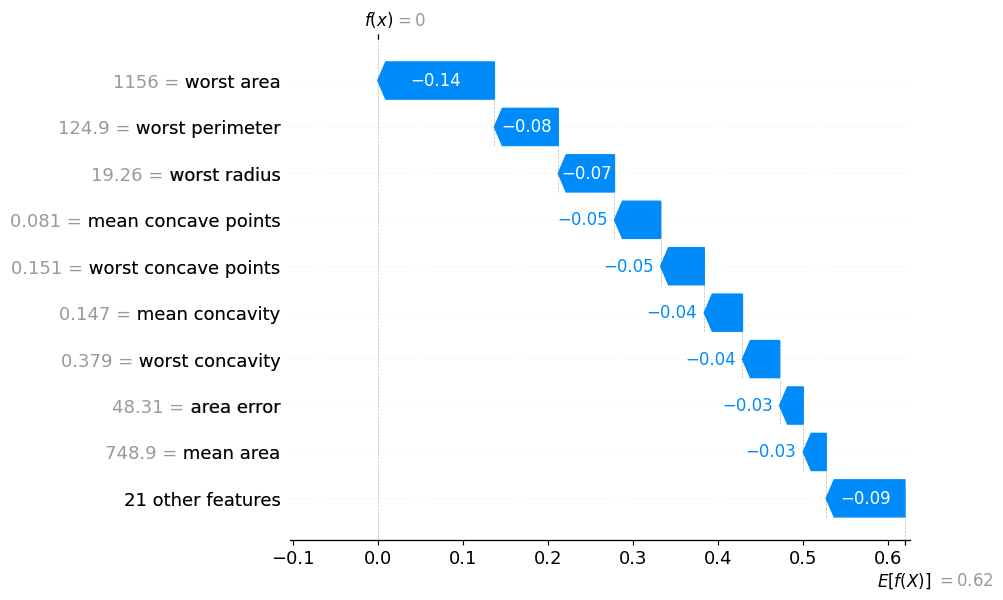

Ejemplo 3 - Clase real: 1


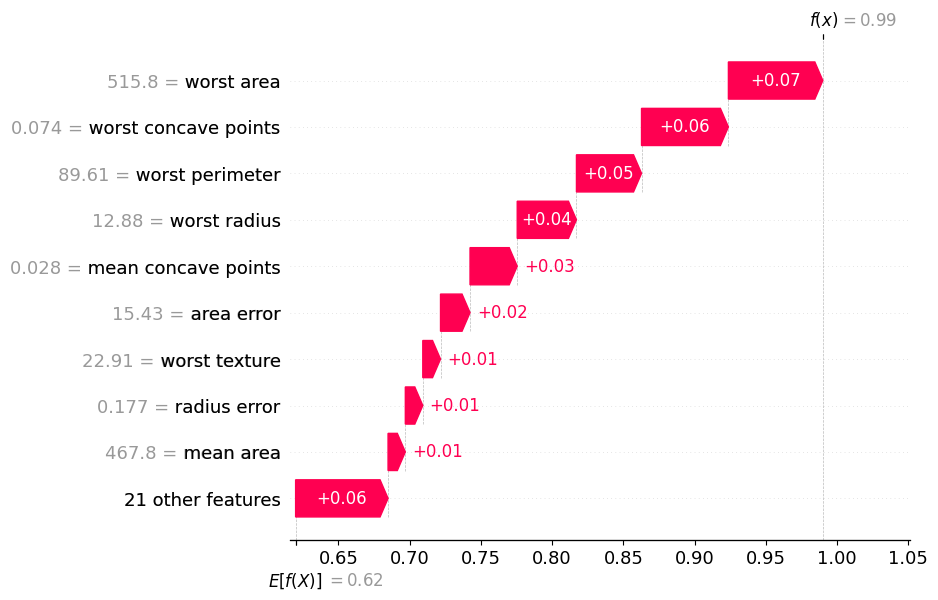

Ejemplo 4 - Clase real: 1


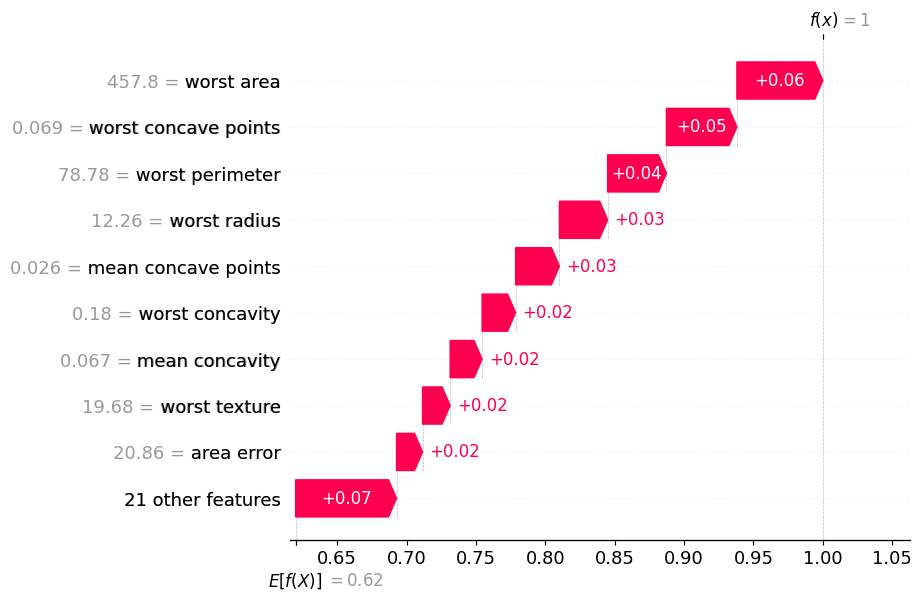

In [13]:
# shap_random_forest_example.ipynb

import shap
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Cargar los datos
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de scikit-learn
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Crear el explainer SHAP para modelos gen√©ricos
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Elegimos la clase 1 (ej: "maligno")
shap_values_class1 = shap_values[:, :, 1]

# Gr√°ficos
shap.plots.beeswarm(shap_values_class1)
shap.plots.bar(shap_values_class1)

# ----------- Interpretabilidad local (1 ejemplo) -----------

# Seleccionar un caso puntual
i = 0
# Interpretabilidad local para varios ejemplos
for i in range(5):  # Cambia 5 por la cantidad de ejemplos que quieras ver
    print(f"Ejemplo {i} - Clase real: {y_test[i]}")
    shap.plots.waterfall(shap_values_class1[i])


# üìä SHAP Values Explained

https://medium.com/biased-algorithms/shap-values-explained-08764ab16466

**Autor**: Amit Yadav  
**Fuente**: Medium - Biased Algorithms

## ‚ú® ¬øQu√© son los SHAP Values?

Los **SHAP (SHapley Additive exPlanations)** son una t√©cnica de interpretaci√≥n de modelos de aprendizaje autom√°tico basada en la teor√≠a de juegos de Shapley. Asignan a cada caracter√≠stica una contribuci√≥n proporcional a la predicci√≥n de un modelo.

## üîç Fundamento te√≥rico

- Inspirados en los valores de **Shapley** de la teor√≠a de juegos cooperativos.
- Eval√∫an la **contribuci√≥n marginal promedio** de cada feature en todas las posibles combinaciones.
- Garantizan **equidad y consistencia** en la atribuci√≥n de importancia a cada variable.

## üß† ¬øPor qu√© son √∫tiles?

- Ofrecen **interpretabilidad local** y **global** en modelos complejos (como Random Forests o XGBoost).
- Son **modelo-agn√≥sticos** y compatibles con modelos de caja negra.
- Permiten **entender decisiones individuales**, lo cual es crucial en contextos sensibles (ej: finanzas, salud).

## ‚öôÔ∏è C√≥mo funcionan

1. Se calcula la predicci√≥n base (valor esperado del modelo).
2. Para cada instancia, se computa el impacto de cada feature como diferencia entre:
   - La predicci√≥n con esa feature incluida.
   - La predicci√≥n con esa feature excluida.
3. El valor SHAP de cada feature es el promedio de esas diferencias sobre todas las combinaciones posibles.

## üìâ Visualizaciones comunes

- **Summary Plot**: muestra el impacto de cada variable en muchas instancias.
- **Force Plot**: explica una predicci√≥n espec√≠fica visualmente.
- **Dependence Plot**: analiza la interacci√≥n entre caracter√≠sticas.

## ‚ö†Ô∏è Limitaciones

- El c√°lculo exacto es **computacionalmente costoso** en modelos con muchas variables.
- Las aproximaciones (como en TreeSHAP) permiten uso pr√°ctico, pero pueden introducir **errores peque√±os**.

## üß™ Conclusi√≥n

SHAP es una herramienta poderosa para explicar predicciones de modelos complejos de forma transparente y equitativa. Su base en la teor√≠a de juegos ofrece garant√≠as formales que otras t√©cnicas no tienen.


# SHAP Values: Explicaci√≥n

## ¬øQu√© son los SHAP Values?

Los SHAP values (SHapley Additive exPlanations) son una t√©cnica para explicar la contribuci√≥n de cada caracter√≠stica (feature) a la predicci√≥n de un modelo. Se basan en la **teor√≠a de juegos de Shapley**, que asigna un "cr√©dito" justo a cada jugador (caracter√≠stica) seg√∫n su aportaci√≥n al resultado.

---

## C√≥mo se calculan los SHAP values (de forma conceptual)

Para una caracter√≠stica \( x_i \):

1. Se consideran todos los subconjuntos \( S \) de caracter√≠sticas que no incluyen a \( x_i \).
2. Para cada subconjunto, se calcula cu√°nto cambia la predicci√≥n al a√±adir \( x_i \):
   \[
   \Delta = f(S \cup \{x_i\}) - f(S)
   \]
3. Se promedia esta diferencia ponderada por la cantidad de subconjuntos para obtener el SHAP value:
   \[
   \phi_i = \sum_{S \subseteq N \setminus \{i\}} \frac{|S|! (n - |S| - 1)!}{n!} \left[ f(S \cup \{x_i\}) - f(S) \right]
   \]

Donde:

- \( n \) = n√∫mero total de caracter√≠sticas
- \( f(S) \) = predicci√≥n del modelo usando solo caracter√≠sticas en \( S \)

---

## Propiedades importantes

- La suma de todos los SHAP values para un ejemplo m√°s el valor esperado del modelo es igual a la predicci√≥n del modelo para ese ejemplo.
- El c√°lculo exacto es costoso, por eso existen m√©todos aproximados como TreeSHAP y KernelSHAP.

---

